# ***Complete Guide to Generative AI for Data Analysis and Data Science***

---



### **Chapter 9:** *Regression*

a) Building a Linear Regression Model

Linear Regression Model:
  Slope (Coefficient): 405.36
  Intercept: 9841.07
  R-squared: 0.9838


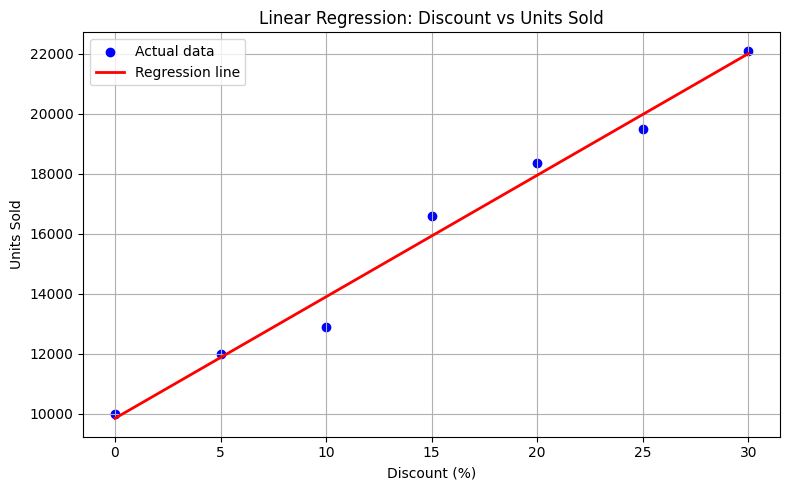

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
discounts = np.array([0, 5, 10, 15, 20, 25, 30]).reshape(-1, 1)
units_sold = np.array([10000, 12000, 12900, 16600, 18350, 19500, 22100])

# Create and fit the model
model = LinearRegression()
model.fit(discounts, units_sold) #(X,y)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(discounts, units_sold)

print(f"Linear Regression Model:")
print(f"  Slope (Coefficient): {slope:.2f}")
print(f"  Intercept: {intercept:.2f}")
print(f"  R-squared: {r_squared:.4f}")

# Predict values for plotting
predicted_units = model.predict(discounts)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(discounts, units_sold, color='blue', label='Actual data')
plt.plot(discounts, predicted_units, color='red', linewidth=2, label='Regression line')
plt.xlabel('Discount (%)')
plt.ylabel('Units Sold')
plt.title('Linear Regression: Discount vs Units Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

b) Evaluating Linear Regression Model
1.   R-squared – How much of the variation in the dependent variable is explained by the model.
2.   p-value – Whether the relationship between the predictor and response is statistically significant.

In [ ]:
from scipy import stats

# === Flatten input arrays for stats.linregress ===
x = discounts.flatten()
y = units_sold

# === Calculate slope, intercept, r-value, p-value, and std error ===
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# === R-squared ===
r_squared = r_value**2

# === Output ===
print("\nModel Evaluation:")
print(f"  Slope (β₁): {slope:.4f}")
print(f"  Intercept (β₀): {intercept:.4f}")
print(f"  R-squared: {r_squared:.4f}")
print(f"  P-value for the slope: {p_value:.4f}")

# === Interpretation ===
if p_value < 0.05:
    print("  → Statistically significant relationship (reject H₀)")
else:
    print("  → No statistically significant relationship (fail to reject H₀)")


Model Evaluation:
  Slope (β₁): 405.3571
  Intercept (β₀): 9841.0714
  R-squared: 0.9838
  P-value for the slope: 0.0000
  → Statistically significant relationship (reject H₀)


**Challenge: Linear Regression** <br>
Use the housing data, build a linear regression model to predict the sales price of a house, using total area of the house as the independent variable.

Slope (β₁): 461.9749
Intercept (β₀): 2387308.4824
R-squared: 0.2872931546811469
Mean Squared Error (MSE): 2488861398180.6567


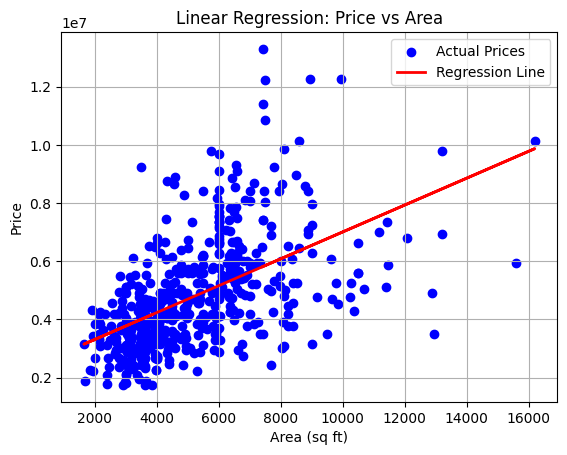

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
#Lower the MSE, better the model is working

# === Load your dataset ===
df = pd.read_csv('/content/Housing.csv')

# === Extract independent and dependent variables ===
X = df[['area']]  # independent variable
y = df['price']   # dependent variable

# === Create and train the model ===
model = LinearRegression()
model.fit(X, y)

# === Make predictions ===
predictions = model.predict(X)

# Evaluation metrics
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

# === Output slope and intercept ===
print(f"Slope (β₁): {model.coef_[0]:.4f}")
print(f"Intercept (β₀): {model.intercept_:.4f}")
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

# === Plotting ===
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Area')
plt.legend()
plt.grid(True)
plt.show()